In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Specify dataset path and image size to use
dataset_path = 'C:/Users/NCC/Desktop/thesis/dataset/ship-balance/'
img_size = 128
img_dim = (img_size,img_size)
img_shape = (img_size,img_size,3)
batch_size = 32
num_epoch = 10

In [4]:
# Read the train.csv
train_csv = pd.read_csv(dataset_path+'train.csv')

In [5]:
train_csv

,image,category
0,2870024.jpg,1
1,2900420.jpg,3
2,2804883.jpg,2
3,2859567.jpg,3
4,2847618.jpg,3
...,...,...
2495,2511203.jpg,2
2496,2829250.jpg,5
2497,2890662.jpg,3
2498,2603499.jpg,4


In [6]:
x_train = np.array([img_to_array(load_img(dataset_path+'train/'+img_name, target_size=img_dim)) for img_name in train_csv.image])

In [7]:
y_train = to_categorical(train_csv['category'].values - 1)

In [8]:
print("training image shape = ", x_train.shape)
print("training class shape = ", y_train.shape)

training image shape =  (2500, 128, 128, 3)
training class shape =  (2500, 5)


In [9]:
# Create the augmentation configuration and image generators
train_datagen = ImageDataGenerator(rescale=1./255,  
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    brightness_range=[0.5,1],
                                    horizontal_flip=True,)
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

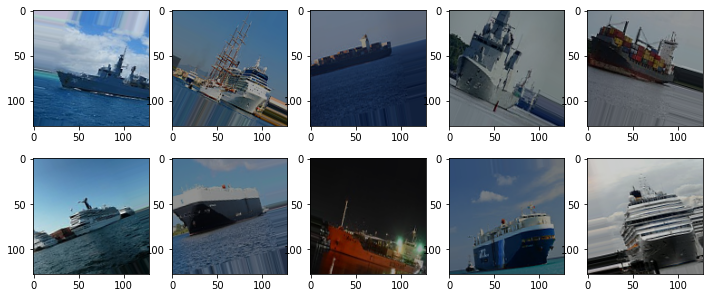

In [10]:
# Display sample images applied by augmentation
plt.figure(figsize=(12,5))
x,y = train_generator.next()
for i in range(1,11):
    image = x[i]
    plt.subplot(2,5,i)
    plt.imshow(image)

In [11]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=img_shape)
base_model.trainable = False

model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024,activation='relu'),
  Dense(512,activation='relu'),
  Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 4,805,829
Trainable params: 1,576,965
Non-trainable params: 3,228,864
_________________________________________________________________


In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(x_train) // batch_size,
                              epochs=num_epoch)

C:\Users\NCC\anaconda3\envs\env-11\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
78/78 [==============================] - 14s 104ms/step - loss: 0.7651 - accuracy: 0.7601
Epoch 2/10
78/78 [==============================] - 8s 102ms/step - loss: 0.1631 - accuracy: 0.9382
Epoch 3/10
78/78 [==============================] - 8s 101ms/step - loss: 0.1029 - accuracy: 0.9641
Epoch 4/10
78/78 [==============================] - 8s 102ms/step - loss: 0.1204 - accuracy: 0.9575
Epoch 5/10
78/78 [==============================] - 8s 101ms/step - loss: 0.1325 - accuracy: 0.9533
Epoch 6/10
78/78 [==============================] - 8s 101ms/step - loss: 0.1165 - accuracy: 0.9528
Epoch 7/10
78/78 [==============================] - 8s 101ms/step - loss: 0.1106 - accuracy: 0.9623
Epoch 8/10
78/78 [==============================] - 8s 101ms/step - loss: 0.0780 - accuracy: 0.9671
Epoch 9/10
78/78 [==============================] - 8s 101ms/step - loss: 0.0796 - accuracy: 0.9722
Epoch 10/10
78/78 [==============================] - 8s 101ms/step - loss: 0.0875 - accuracy: 0.966

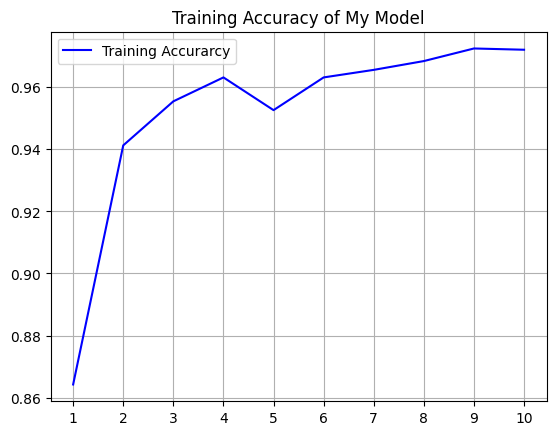

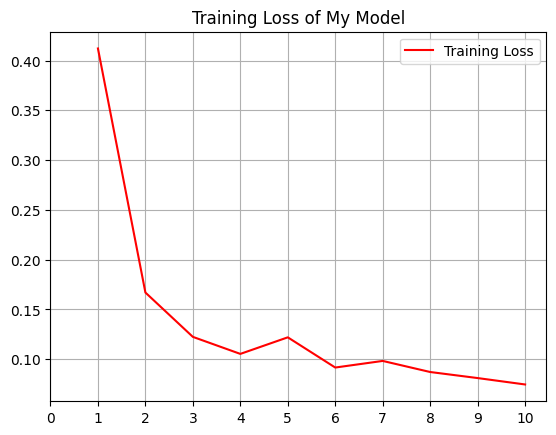

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.style.use('default')
plt.grid(True)
plt.xticks(np.arange(0, len(acc)+1, 1.0))
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.title('Training Accuracy of My Model')
plt.legend()
plt.grid(True)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.grid(True)
plt.xticks(np.arange(0, len(acc)+1, 1.0))
plt.title('Training Loss of My Model')
plt.legend()
plt.show()

In [14]:
test_csv = pd.read_csv(dataset_path+'test.csv')

In [15]:
x_test = np.array([img_to_array(load_img(dataset_path+'test/'+img_name, target_size=img_dim)) for img_name in test_csv.image])
x_test = x_test/255.0

In [16]:
y_test_vector = test_csv['category'].values - 1
y_test_onehot = to_categorical(y_test_vector)

In [17]:
print("testing image shape = ", x_test.shape)
print("testing class shape = ", y_test_onehot.shape)

testing image shape =  (500, 128, 128, 3)
testing class shape =  (500, 5)


In [18]:
model.evaluate(x_test, y_test_onehot)

16/16 [==============================] - 1s 44ms/step - loss: 0.3054 - accuracy: 0.9100


[0.3053590953350067, 0.9100000262260437]

In [20]:
y_pred_onehot = model.predict(x_test)
y_pred_vector = [np.argmax(y_pred_onehot[i]) for i in range(len(y_pred_onehot))]

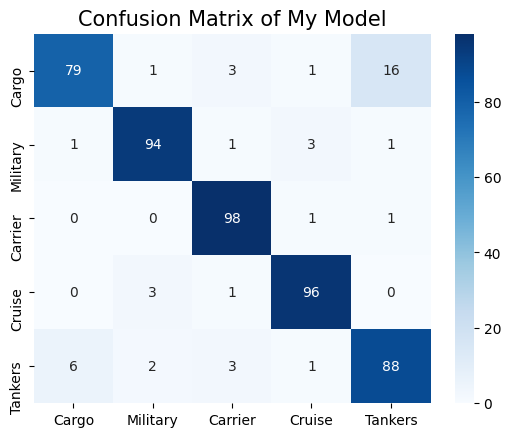

In [21]:
cm_arr = confusion_matrix(y_test_vector, y_pred_vector)
df_cm = pd.DataFrame(cm_arr, index = ['Cargo', 'Military', 'Carrier', 'Cruise', 'Tankers'], columns = ['Cargo', 'Military', 'Carrier', 'Cruise', 'Tankers'])
plt.figure()
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix of My Model',fontsize = 15)
plt.show()

In [26]:
def printReport(y_test, y_pred, name):
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)
    df_rp = pd.DataFrame(report).transpose()
    export_rp = df_rp.to_csv(r''+name+'_cls-report.csv', index = None, header=True)
printReport(y_test_vector, y_pred_vector, "MobileNet")

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       100
           1       0.94      0.94      0.94       100
           2       0.92      0.98      0.95       100
           3       0.94      0.96      0.95       100
           4       0.83      0.88      0.85       100

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

